In [76]:
import pandas as pd
import numpy as np
import requests
import re
import json
import string 
import syllables
import matplotlib.pyplot as plt

In [38]:
!pip install syllables

You should consider upgrading via the '/Users/maoshirley/.pyenv/versions/3.7.7/envs/lewagon/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
df = pd.read_csv('../../data/remove_links.csv')

In [3]:
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
def posts_split(posts):
    # split the posts column into 50 separate posts in a list
    posts_split = posts.split('|||')
    
    # split each of the 50 posts into a list of its words/URL links
    # so we have a list of 50 posts and each post is a list of the words/URL links
                
    return posts_split

In [5]:
df['posts_split'] = df['posts'].apply(posts_split)

In [9]:
df

,type,posts,posts_split
0,INFJ,and intj moments sportscenter not top ten pl...,[and intj moments sportscenter not top ten p...
1,ENTP,'I'm finding the lack of me in these posts ver...,['I'm finding the lack of me in these posts ve...
2,INTP,"'Good one _____ course, to which I say I kn...","['Good one _____ course, to which I say I k..."
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","['Dear INTP, I enjoyed our conversation the ..."
4,ENTJ,'You're fired.|||That's another silly misconce...,"['You're fired., That's another silly misconce..."
...,...,...,...
8670,ISFP,just because I always think of cats as Fi doms...,[just because I always think of cats as Fi dom...
8671,ENFP,'So...if this thread already exists someplace ...,['So...if this thread already exists someplace...
8672,INTP,'So many questions when i do these things. I ...,['So many questions when i do these things. I...
8673,INFP,'I am very conflicted right now when it comes ...,['I am very conflicted right now when it comes...


# Readability of texts
> 206.835 - 1.015(total words/total sentences) -84.6(total syllables/total words)

In [11]:
len(df['posts_split'][1])

41

In [53]:
#how many sentences/posts
# def sentence_count(X):
#     count = []
#     for i in X['posts_split']:
#         count.append(len(i))
#     X['sentence_count'] = count
#     return X

def sentence_count(X):
    return len(X)

# count the words in each posts
# def word_count(X):
#     word_count_ls = []
#     for i in X['posts_split']:
#         word_count_ls.append(len(i.split()))
#         X['word_count'] = word_count_ls
#     return X

def word_count(X):
    count = 0
    for sentence in X:
        count += len(sentence.split())
    return count

def syll_count(X):
    count_syll = 0
    for sentence in X:
        sentence = sentence.split()
        for word in sentence:
            count_syll +=  syllables.estimate(word)
    return count_syll

In [47]:
df['sentence_count'] = df.posts_split.apply(sentence_count)

In [55]:
df_test = df.iloc[:3]

In [56]:
df_test

,type,posts,posts_split,word_count,sentence_count
0,INFJ,and intj moments sportscenter not top ten pl...,[and intj moments sportscenter not top ten p...,561,24
1,ENTP,'I'm finding the lack of me in these posts ver...,['I'm finding the lack of me in these posts ve...,1202,41
2,INTP,"'Good one _____ course, to which I say I kn...","['Good one _____ course, to which I say I k...",872,42


In [59]:
df['syll_count'] = df.posts_split.apply(syll_count)

In [60]:
df.head()

,type,posts,posts_split,word_count,sentence_count,syll_count
0,INFJ,and intj moments sportscenter not top ten pl...,[and intj moments sportscenter not top ten p...,561,24,862
1,ENTP,'I'm finding the lack of me in these posts ver...,['I'm finding the lack of me in these posts ve...,1202,41,1668
2,INTP,"'Good one _____ course, to which I say I kn...","['Good one _____ course, to which I say I k...",872,42,1316
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","['Dear INTP, I enjoyed our conversation the ...",1109,48,1663
4,ENTJ,'You're fired.|||That's another silly misconce...,"['You're fired., That's another silly misconce...",1003,42,1488


In [87]:
df_sum = df.groupby(['type']).sum()
df_sum

,word_count,sentence_count,syll_count
type,,,
ENFJ,252578,8781,366118
ENFP,879814,31192,1269899
ENTJ,291173,10639,431012
ENTP,855779,32195,1259920
ESFJ,56068,1961,81390
ESFP,50952,2054,73796
ESTJ,49630,1819,71830
ESTP,107189,4075,154060
INFJ,1940618,67138,2840424


In [89]:
def readability(X):
    X['result'] = 206.835 - 1.015*(X['word_count']/X['sentence_count']) -84.6*(X['syll_count']/X['word_count'])
    return X

In [90]:
df_sum = readability(df_sum)

<BarContainer object of 16 artists>

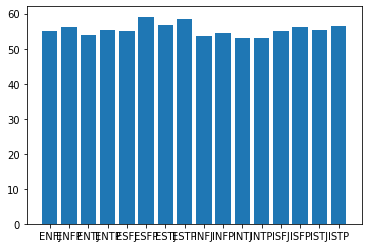

In [95]:
plt.bar(df_sum.index,height = df_sum['result'])

# Richness

In [103]:
df_median = df.groupby(['type']).median()
df_median

,word_count,sentence_count,syll_count
type,,,
ENFJ,1390.0,49.0,2036.5
ENFP,1343.0,49.0,1946.0
ENTJ,1302.0,49.0,1931.0
ENTP,1284.0,49.0,1907.0
ESFJ,1367.5,50.0,2025.5
ESFP,1147.5,47.5,1701.0
ESTJ,1333.0,50.0,1914.0
ESTP,1255.0,49.0,1813.0
INFJ,1379.5,49.0,2026.0


<BarContainer object of 16 artists>

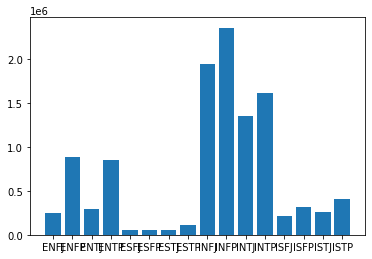

In [104]:
plt.bar(df_median.index,height = df_sum['word_count'])